<a href="https://colab.research.google.com/github/Thomas-D40/deep-learning/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quand on réalise un travail sur l'index du temps, on remarquera notamment trois types de pattern:
- seasonality
- trends (tendance)
- noise

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [7]:
!ls '/gdrive/MyDrive/datasets/temperature_merignac.csv'

/gdrive/MyDrive/datasets/temperature_merignac.csv


# Import Data

In [9]:
import pandas as pd

df = pd.read_csv('/gdrive/MyDrive/datasets/temperature_merignac.csv')

In [11]:
df.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
114,2020,9.03,10.93,10.53,15.58,18.28,18.68,22.58,23.03,20.03,14.08,12.23,8.59,9.90,14.80,21.43,15.45,15.39
115,2021,6.29,10.89,10.59,12.79,14.64,20.64,20.99,20.64,20.49,14.84,8.59,8.74,8.59,12.67,20.76,14.64,14.16
116,2022,5.94,9.64,11.74,13.04,19.34,21.84,24.19,25.29,19.99,19.24,12.54,8.70,8.11,14.71,23.77,17.26,15.96
117,2023,7.35,7.50,11.90,13.75,17.65,22.50,22.15,22.95,22.65,17.95,11.70,9.15,7.85,14.43,22.53,17.43,15.56
118,2024,7.90,10.40,11.86,13.95,15.65,19.85,22.35,22.50,17.70,16.50,12.55,8.00,9.15,13.82,21.57,15.58,15.03


# Créer la série temporelle

In [51]:
temps = df.loc[:, "JAN" : "DEC"]

In [52]:
temps

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,7.00,5.58,8.05,10.49,15.38,20.07,21.00,22.41,19.64,15.47,9.08,4.44
1,3.69,4.43,8.68,10.78,14.85,17.25,19.15,20.62,20.29,13.49,10.01,9.17
2,4.95,6.48,7.19,9.71,16.64,18.95,19.84,19.91,17.48,15.71,10.17,6.89
3,3.42,3.90,7.61,13.31,16.16,16.20,18.19,20.32,16.41,14.54,5.90,7.59
4,5.60,7.60,9.20,10.22,13.18,17.48,18.18,19.13,16.66,14.31,10.12,7.42
...,...,...,...,...,...,...,...,...,...,...,...,...
114,9.03,10.93,10.53,15.58,18.28,18.68,22.58,23.03,20.03,14.08,12.23,8.59
115,6.29,10.89,10.59,12.79,14.64,20.64,20.99,20.64,20.49,14.84,8.59,8.74
116,5.94,9.64,11.74,13.04,19.34,21.84,24.19,25.29,19.99,19.24,12.54,8.70
117,7.35,7.50,11.90,13.75,17.65,22.50,22.15,22.95,22.65,17.95,11.70,9.15


In [186]:
import numpy as np

# Ici on va remplacer les valeurs nulles par les moyennes des valeurs de chaque colonne, ce qui devrait éviter de trop fausser les données
for columns in temps.columns:
    temps[columns] = temps[columns].replace(999.9, np.nan)

    temps[columns] = temps[columns].fillna(temps[columns].mean())
temps

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,7.00,5.58,8.05,10.49,15.38,20.07,21.00,22.41,19.64,15.47,9.08,4.44
1,3.69,4.43,8.68,10.78,14.85,17.25,19.15,20.62,20.29,13.49,10.01,9.17
2,4.95,6.48,7.19,9.71,16.64,18.95,19.84,19.91,17.48,15.71,10.17,6.89
3,3.42,3.90,7.61,13.31,16.16,16.20,18.19,20.32,16.41,14.54,5.90,7.59
4,5.60,7.60,9.20,10.22,13.18,17.48,18.18,19.13,16.66,14.31,10.12,7.42
...,...,...,...,...,...,...,...,...,...,...,...,...
114,9.03,10.93,10.53,15.58,18.28,18.68,22.58,23.03,20.03,14.08,12.23,8.59
115,6.29,10.89,10.59,12.79,14.64,20.64,20.99,20.64,20.49,14.84,8.59,8.74
116,5.94,9.64,11.74,13.04,19.34,21.84,24.19,25.29,19.99,19.24,12.54,8.70
117,7.35,7.50,11.90,13.75,17.65,22.50,22.15,22.95,22.65,17.95,11.70,9.15


In [187]:
series = []

for i, row in temps.iterrows():
    series = series + list(row)

print(series), len(series) # 1284 => 107 années sur les 119 en retirant les 12 ans informations complètes

[7.0, 5.58, 8.05, 10.49, 15.38, 20.07, 21.0, 22.41, 19.64, 15.47, 9.08, 4.44, 3.69, 4.43, 8.68, 10.78, 14.85, 17.25, 19.15, 20.62, 20.29, 13.49, 10.01, 9.17, 4.95, 6.48, 7.19, 9.71, 16.64, 18.95, 19.84, 19.91, 17.48, 15.71, 10.17, 6.89, 3.42, 3.9, 7.61, 13.31, 16.16, 16.2, 18.19, 20.32, 16.41, 14.54, 5.9, 7.59, 5.6, 7.6, 9.2, 10.22, 13.18, 17.48, 18.18, 19.13, 16.66, 14.31, 10.12, 7.42, 0.07, 5.49, 8.93, 10.39, 15.19, 18.48, 24.12, 23.93, 21.16, 13.85, 9.79, 8.79, 6.22, 9.95, 10.71, 11.14, 16.43, 16.56, 18.69, 16.96, 15.02, 12.18, 7.18, 7.37, 8.3, 6.99, 9.75, 10.76, 14.68, 17.63, 18.58, 20.54, 17.67, 14.73, 11.04, 4.64, 0.61, 9.46, 9.43, 13.83, 14.87, 17.43, 19.03, 20.9, 18.55, 12.79, 7.43, 7.74, 6.293611111111112, 7.348240740740741, 9.81324074074074, 12.103333333333332, 15.548333333333337, 18.7325, 20.648425925925924, 20.726074766355136, 18.362056074766357, 14.48018691588785, 9.677570093457945, 7.036666666666667, 6.293611111111112, 7.348240740740741, 9.81324074074074, 12.1033333333333

(None, 1428)

In [188]:
import numpy as np

series = np.array(series)

In [59]:
series.shape

(1428,)

# Visualisation d'une série temporelle

In [66]:
time = np.arange(len(series))

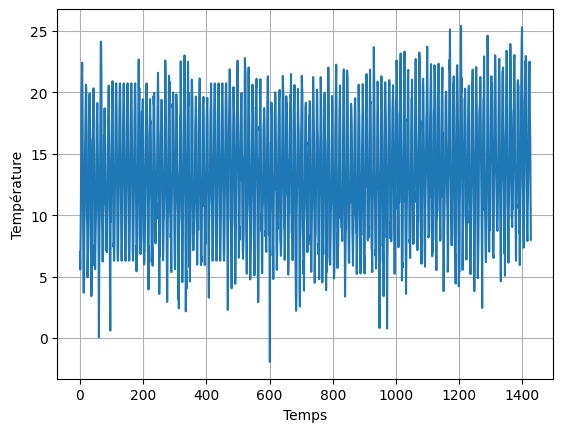

In [65]:
import matplotlib.pyplot as plt

plt.plot(time, series)
plt.xlabel("Temps")
plt.ylabel("Température")
plt.grid(True)
plt.show()

In [43]:
np.argmax(series)

108

# Baseline

In [191]:
 # train_test_split

 time_train = time[:1000]
 x_train = series[:1000]
 time_test = time[1000:]
 x_test = series[1000:]

In [73]:
years = df['YEAR'].tolist()
1000/12 # => 83
years[84] # => 1990 => Entrainement 1906 - 1989 / Test: 1990 - 2024

1990

In [88]:
# Approche naïve

pred_naive = series[999:-1]
pred_naive.shape

(428,)

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(x_test, pred_naive)
mae

2.850630841121496

In [90]:
mse = mean_squared_error(x_test, pred_naive)
mse

11.759694158878506

## Moving Average

Dans ce cas, pour prédire x, on voudrait pas les valeurs de x - 1 et x - 2 et faire la moyenne

In [96]:
move_average_pred = []

for index in np.arange(998, len(series) - 2, 1):
  average_value = np.mean([series[index - 2], series[index - 1]])
  move_average_pred.append(average_value)


In [97]:
mean_squared_error(x_test, move_average_pred)

71.98645718457944

In [98]:
mean_absolute_error(x_test, move_average_pred)

7.521553738317757

# Windowed Dataset

In [189]:
import tensorflow as tf

dataset = tf.data.Dataset.range(10)

dataset = dataset.window(5, shift=1, drop_remainder=True)
# Le shift permet de donner l'information sur le décalage à effectuer
# Le drop_remainder=True permet d'arrêter l'itération s'il n'est plus possible de créer une window complète avec les éléments restants

dataset = dataset.flat_map(lambda window: window.batch(5))

for window in dataset:
  print(window)
  print(window.numpy())

tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)
[0 1 2 3 4]
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int64)
[1 2 3 4 5]
tf.Tensor([2 3 4 5 6], shape=(5,), dtype=int64)
[2 3 4 5 6]
tf.Tensor([3 4 5 6 7], shape=(5,), dtype=int64)
[3 4 5 6 7]
tf.Tensor([4 5 6 7 8], shape=(5,), dtype=int64)
[4 5 6 7 8]
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int64)
[5 6 7 8 9]


## Séparation des éléments d'entrée et de la prédiction

In [142]:
import tensorflow as tf

dataset = tf.data.Dataset.range(10)

dataset = dataset.window(5, shift=1, drop_remainder=True)

dataset = dataset.flat_map(lambda window: window.batch(5))

dataset = dataset.map(lambda window: (window[:-1], window[-1:]))

for x, y in dataset:
  print(x, y)
  print(x.numpy(), y.numpy())

tf.Tensor([0 1 2 3], shape=(4,), dtype=int64) tf.Tensor([4], shape=(1,), dtype=int64)
[0 1 2 3] [4]
tf.Tensor([1 2 3 4], shape=(4,), dtype=int64) tf.Tensor([5], shape=(1,), dtype=int64)
[1 2 3 4] [5]
tf.Tensor([2 3 4 5], shape=(4,), dtype=int64) tf.Tensor([6], shape=(1,), dtype=int64)
[2 3 4 5] [6]
tf.Tensor([3 4 5 6], shape=(4,), dtype=int64) tf.Tensor([7], shape=(1,), dtype=int64)
[3 4 5 6] [7]
tf.Tensor([4 5 6 7], shape=(4,), dtype=int64) tf.Tensor([8], shape=(1,), dtype=int64)
[4 5 6 7] [8]
tf.Tensor([5 6 7 8], shape=(4,), dtype=int64) tf.Tensor([9], shape=(1,), dtype=int64)
[5 6 7 8] [9]


## Ajout d'aléatoire (Shuffle)

In [144]:
import tensorflow as tf

dataset = tf.data.Dataset.range(10)

dataset = dataset.window(5, shift=1, drop_remainder=True)

dataset = dataset.flat_map(lambda window: window.batch(5))

dataset = dataset.map(lambda window: (window[:-1], window[-1:]))

dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)

for x, y in dataset:
  print(x.numpy(), y.numpy())

[[2 3 4 5]
 [4 5 6 7]] [[6]
 [8]]
[[1 2 3 4]
 [3 4 5 6]] [[5]
 [7]]
[[5 6 7 8]
 [0 1 2 3]] [[9]
 [4]]


# Préparation des datasets

In [190]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size):
  dataset = tf.data.Dataset.from_tensor_slices(series)

  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

  dataset = dataset.map(lambda window: (window[:-1], window[-1:]))

  dataset = dataset.shuffle(buffer_size=len(series))
  dataset = dataset.batch(batch_size).prefetch(1)

  return dataset

In [193]:
train_dataset = windowed_dataset(x_train, window_size=24, batch_size=32)
test_dataset = windowed_dataset(x_train, window_size=24, batch_size=32)

# Réseaux de neuronnes pour prédire les températures des prochains mois

In [204]:
for feature, label in train_dataset.take(1):
  print(feature.shape)

(32, 24)


In [205]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[24]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [206]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 10)                  │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [207]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [175]:
feature.shape

TensorShape([64, 4])

In [208]:
model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
     30/Unknown 1s 2ms/step - loss: 415.1119  

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 412.3394 - val_loss: 260.1866
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 227.0892 - val_loss: 166.0717
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 142.5608 - val_loss: 101.2028
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 88.3120 - val_loss: 53.8924
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 49.6436 - val_loss: 34.6021
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 32.5291 - val_loss: 28.6598
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 27.2183 - val_loss: 24.9764
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 23.5710 - val_loss: 21.5722
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 22.0382 - val_loss: 18.4675
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 19.1433 - val_loss: 15.9879
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 15.1756 - val_loss: 13.9446
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 

# Prédiction avec réseau de neuronnes

In [209]:
x_test

array([18.83, 19.76, 22.59, 21.51, 18.42, 15.6 , 11.16, 10.08,  7.39,
       12.28, 11.  , 11.44, 18.27, 18.48, 22.04, 23.16, 19.36, 15.7 ,
       10.15,  4.69,  6.12,  5.75, 11.76, 11.07, 14.81, 17.18, 21.26,
       23.32, 20.71, 12.75,  9.31,  5.52,  3.59,  6.87,  9.9 , 11.7 ,
       17.79, 17.67, 21.41, 21.82, 17.33, 12.12, 12.61,  7.78,  8.02,
        6.52, 10.  , 11.98, 16.1 , 19.45, 19.53, 21.03, 16.64, 12.82,
        7.67,  9.21,  7.71,  8.54, 12.02, 11.07, 16.13, 19.15, 22.7 ,
       22.7 , 17.06, 15.19, 12.49,  9.15,  7.15,  9.87,  9.43, 12.42,
       16.29, 18.96, 23.24, 22.61, 16.41, 17.7 , 10.09,  8.18,  9.6 ,
        6.05,  9.6 , 12.77, 15.31, 20.56, 21.11, 19.96, 16.49, 14.26,
        9.64,  6.99,  5.81, 10.27, 12.14, 13.49, 17.66, 18.38, 20.78,
       23.71, 19.88, 15.94, 11.31,  8.19,  8.34,  8.63, 11.36, 11.48,
       17.34, 18.88, 20.22, 22.29, 18.8 , 13.97,  7.98,  6.66,  7.84,
        7.02, 10.95, 12.79, 18.24, 18.72, 22.2 , 21.82, 20.01, 15.02,
        8.04,  7.95,

In [211]:
series[1000-24:1000].shape

(451,)

In [213]:
r = model.predict(series[1000-24:1000].reshape(1,-1))
r.item()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


13.783014297485352

In [228]:
(len(series) - 976 - 20) / 24

18.0

In [ ]:
series[10: 10 + 24].shape

In [238]:
forecast = []
for time in range(1000-24, len(series) - 24):
  series_to_predict = series[time: time + 24].reshape(1,-1)
  r = model.predict(series_to_predict)
  forecast.append(r.item())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━

mae :  1.5145839844908668
mse :  3.6979405354194097


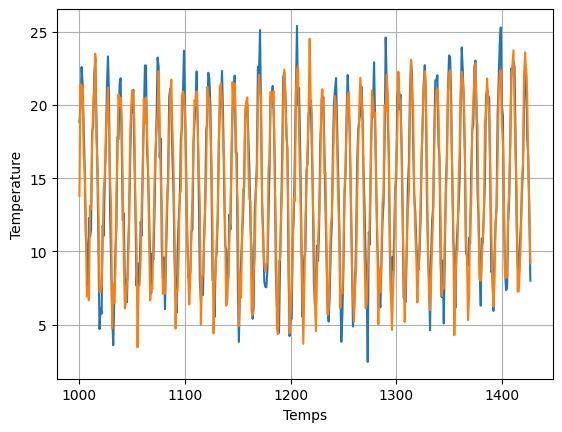

In [243]:
import matplotlib.pyplot as plt


print('mae : ', mean_absolute_error(x_test, forecast))
print('mse : ', mean_squared_error(x_test, forecast))
plt.plot(time_test, x_test)
plt.plot(time_test, forecast)
plt.xlabel('Temps')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

# Entrainement d'un CNN


Sur des données numériques du style: [4,5,3,-1,0,9], il est possible de mettre un système de convolution non pas en Conv2D comme pour les photos avec l'application de filtre en (3,3), mais Conv1D:
Exemple:
[4,5,3,-1,0,9] sans padding auquel on applique un filtre [-1,0,1]
=> pour la seconde valeur: 4*-1 + 5*0 + 3*1 => -1

In [247]:
series.reshape(-1,1).shape

(1428, 1)

In [249]:
import tensorflow as tf

def windowed_dataset_for_CNN(series, window_size, batch_size):
  # Reshape sur une dimension
  series = series.reshape(-1,1)
  dataset = tf.data.Dataset.from_tensor_slices(series)

  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

  dataset = dataset.map(lambda window: (window[:-1], window[-1:]))

  dataset = dataset.shuffle(buffer_size=len(series))
  dataset = dataset.batch(batch_size).prefetch(1)

  return dataset

In [252]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=[None,1]),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3,
                      padding="causal", activation="relu"),
    tf.keras.layers.Dense(28, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [254]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, None, 128)           │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, None, 28)            │           3,612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, None, 10)            │             290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, None, 1)             │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,425 (17.29 KB)

 Trainable params: 4,425 (17.29 KB)

 Non-trainable params: 0 (0.00 B)

In [255]:
model.compile(loss="mse", optimizer="adam")

In [256]:
h = model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
     19/Unknown 2s 6ms/step - loss: 234.0580

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 223.1541 - val_loss: 174.6610
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 166.9104 - val_loss: 106.1635
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 72.7784 - val_loss: 48.3550
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 47.0428 - val_loss: 45.3060
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 42.9829 - val_loss: 41.8600
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 40.8483 - val_loss: 39.2360
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 39.4423 - val_loss: 36.8222
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 36.4292 - val_loss: 35.6178
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 35.3590 - val_loss: 34.7289
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 34.7368 - val_loss: 32.8019
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 31.8902 - val_loss: 31.8575
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━

In [261]:
import tensorflow as tf

def predict_dataset_for_CNN(model, series, window_size):

  dataset = tf.data.Dataset.from_tensor_slices(series)

  dataset = dataset.window(window_size, shift=1, drop_remainder=True)

  dataset = dataset.flat_map(lambda window: window.batch(window_size))

  dataset = dataset.shuffle(buffer_size=len(series))
  dataset = dataset.batch(32).prefetch(1)

  forecast = model.predict(dataset)

  return forecast

In [258]:
series[1000-24: -1].shape

(451,)

In [262]:
cnn_forecast = predict_dataset_for_CNN(model, series[1000-24: -1], 24)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [263]:
cnn_forecast.shape

(428, 24, 1)

In [265]:
results = cnn_forecast[:, -1,0]

In [282]:
results.shape

(428,)

mae :  4.902475734781996
mse :  32.50156861226536


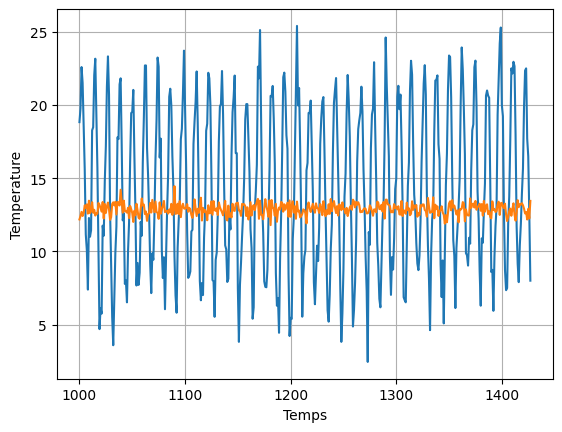

In [267]:
import matplotlib.pyplot as plt


print('mae : ', mean_absolute_error(x_test, results))
print('mse : ', mean_squared_error(x_test, results))
plt.plot(time_test, x_test)
plt.plot(time_test, results)
plt.xlabel('Temps')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

# Entrainement d'un RNN

In [268]:
import tensorflow as tf

def windowed_dataset_for_RNN(series, window_size, batch_size):
  # Reshape sur une dimension
  series = series.reshape(-1,1)
  dataset = tf.data.Dataset.from_tensor_slices(series)

  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

  dataset = dataset.map(lambda window: (window[:-1], window[-1:]))

  dataset = dataset.shuffle(buffer_size=len(series))
  dataset = dataset.batch(batch_size).prefetch(1)

  return dataset

In [269]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=[None,1]),
    tf.keras.layers.SimpleRNN(100, return_sequences=True),
    tf.keras.layers.SimpleRNN(100),
    tf.keras.layers.Dense(28, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [270]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, None, 100)           │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 28)                  │           2,828 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │             290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,429 (130.58 KB)

 Trainable params: 33,429 (130.58 KB)

 Non-trainable params: 0 (0.00 B)

## Ajout du loss Huber pour les séries temporelles

In [274]:
huber = tf.keras.losses.Huber()
model.compile(loss=huber, optimizer="adam")

model.fit(train_dataset, epochs=50, validation_data=test_dataset)

Epoch 1/50
     29/Unknown 5s 15ms/step - loss: 7.7188

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 7.5159 - val_loss: 3.4886
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7540 - val_loss: 0.9993
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.9271 - val_loss: 0.8375
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.8735 - val_loss: 0.8610
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.8164 - val_loss: 0.7954
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.8301 - val_loss: 0.8276
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.8069 - val_loss: 0.8463
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.8427 - val_loss: 0.8015
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.8162 - val_loss: 0.7564
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.7625 - val_loss: 0.7648
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.7611 - val_loss: 0.8412
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.8551 - val_l

In [275]:
rnn_forecast = predict_dataset_for_CNN(model, series[1000-24: -1], 24)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [278]:
rnn_forecast = rnn_forecast[:, 0]

In [279]:
x_test.shape, rnn_forecast.shape

((428,), (428,))

mae :  6.480512954364313
mse :  62.9390397149337


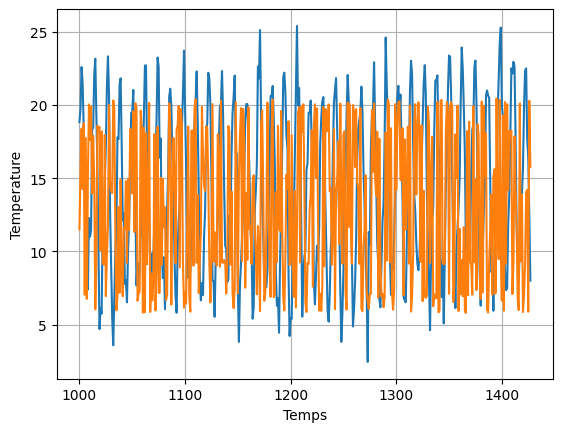

In [281]:
import matplotlib.pyplot as plt


print('mae : ', mean_absolute_error(x_test, rnn_forecast))
print('mse : ', mean_squared_error(x_test, rnn_forecast))
plt.plot(time_test, x_test)
plt.plot(time_test, rnn_forecast)
plt.xlabel('Temps')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

# Données scalées & RNN Normalized

In [283]:
x_train_scaled = (x_train - x_train.mean()) / x_train.std() # stf: écart-type
x_test_scaled = (x_test - x_train.mean()) / x_train.std()

In [284]:
train_dataset = windowed_dataset_for_RNN(x_train_scaled, window_size=24, batch_size=32)
test_dataset = windowed_dataset_for_RNN(x_test_scaled, window_size=24, batch_size=32)

In [285]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=[None,1]),
    tf.keras.layers.SimpleRNN(100, return_sequences=True),
    tf.keras.layers.SimpleRNN(100),
    tf.keras.layers.Dense(28, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [286]:
huber = tf.keras.losses.Huber()
model.compile(loss=huber, optimizer="adam")

model.fit(train_dataset, epochs=50, validation_data=test_dataset)

Epoch 1/50
     30/Unknown 4s 25ms/step - loss: 0.1710

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.1660 - val_loss: 0.0846
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0473 - val_loss: 0.0797
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0432 - val_loss: 0.0686
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0419 - val_loss: 0.0648
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0416 - val_loss: 0.0886
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0432 - val_loss: 0.0539
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0381 - val_loss: 0.0567
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0438 - val_loss: 0.0715
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0385 - val_loss: 0.0659
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0413 - val_loss: 0.0745
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0416 - val_loss: 0.0762
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0348 - val_l

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
mae :  1.1951851379721716
mse :  2.1621434449644434


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


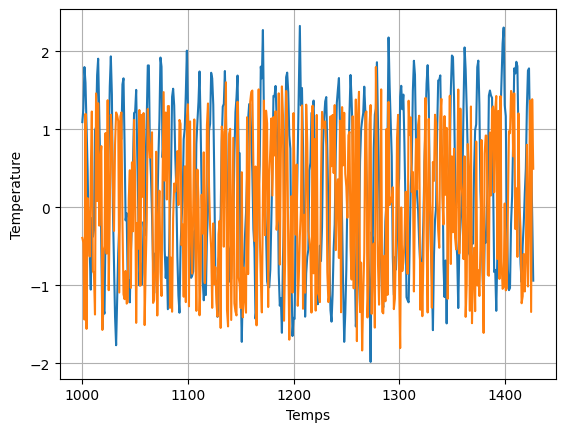

In [289]:
import matplotlib.pyplot as plt

series_scaled = (series - series.mean()) / series.std()

rnn_forecast = predict_dataset_for_CNN(model, series_scaled[1000-24: -1], 24)
rnn_forecast = rnn_forecast[:, 0]

print('mae : ', mean_absolute_error(x_test_scaled, rnn_forecast))
print('mse : ', mean_squared_error(x_test_scaled, rnn_forecast))
plt.plot(time_test, x_test_scaled)
plt.plot(time_test, rnn_forecast)
plt.xlabel('Temps')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

# Modèle GRU: Gated Recurrent Unit (Variation LSTM)

In [291]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=[None,1]),
    tf.keras.layers.GRU(100, return_sequences=True, dropout=0.1),
    tf.keras.layers.GRU(100),
    tf.keras.layers.Dense(28, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [292]:
huber = tf.keras.losses.Huber()
model.compile(loss=huber, optimizer="adam")

model.fit(train_dataset, epochs=50, validation_data=test_dataset)

Epoch 1/50
     30/Unknown 7s 40ms/step - loss: 0.3007

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.2938 - val_loss: 0.1620
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0899 - val_loss: 0.0994
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0918 - val_loss: 0.0860
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0863 - val_loss: 0.0898
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0889 - val_loss: 0.0745
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - loss: 0.0940 - val_loss: 0.0601
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0889 - val_loss: 0.0701
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0953 - val_loss: 0.0800
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0807 - val_loss: 0.0719
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0894 - val_loss: 0.0738
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0744 - val_loss: 0.0812
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0881 - val

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
mae :  1.1180093217476312
mse :  1.9301350717254717


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


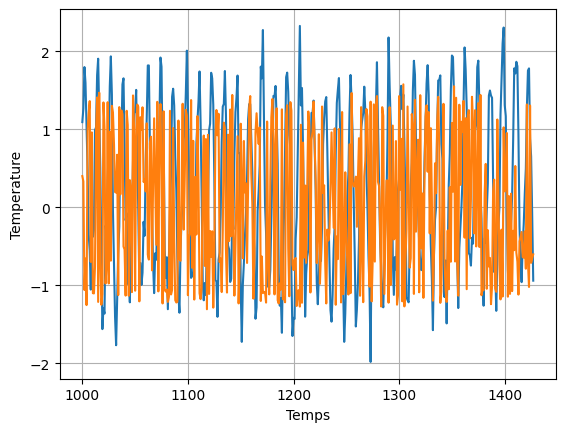

In [293]:
import matplotlib.pyplot as plt

series_scaled = (series - series.mean()) / series.std()

gru_forecast = predict_dataset_for_CNN(model, series_scaled[1000-24: -1], 24)
gru_forecast = gru_forecast[:, 0]

print('mae : ', mean_absolute_error(x_test_scaled, gru_forecast))
print('mse : ', mean_squared_error(x_test_scaled, gru_forecast))
plt.plot(time_test, x_test_scaled)
plt.plot(time_test, gru_forecast)
plt.xlabel('Temps')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

# LSTM

In [294]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=[None,1]),
    tf.keras.layers.LSTM(100, return_sequences=True, dropout=0.1),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(28, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [295]:
huber = tf.keras.losses.Huber()
model.compile(loss=huber, optimizer="adam")

model.fit(train_dataset, epochs=50, validation_data=test_dataset)

Epoch 1/50
     30/Unknown 6s 37ms/step - loss: 0.3590

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.3533 - val_loss: 0.1775
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.1063 - val_loss: 0.0978
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0912 - val_loss: 0.0898
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0864 - val_loss: 0.0918
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0891 - val_loss: 0.0692
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0783 - val_loss: 0.0892
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0861 - val_loss: 0.0907
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0934 - val_loss: 0.0905
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0829 - val_loss: 0.0736
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0860 - val_loss: 0.0726
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0783 - val_loss: 0.0865
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0912 - val

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
mae :  1.2202137508287638
mse :  2.211158529017517


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


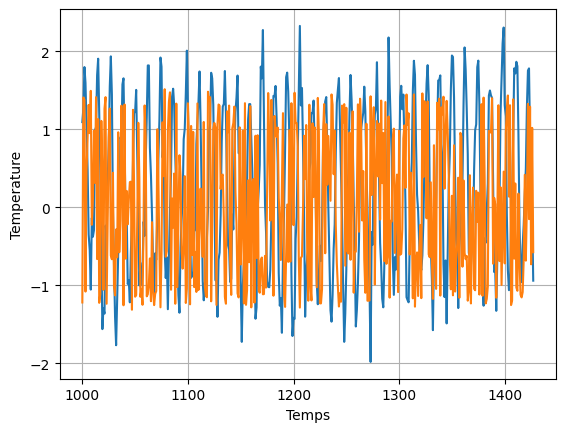

In [296]:
import matplotlib.pyplot as plt

series_scaled = (series - series.mean()) / series.std()

lstm_forecast = predict_dataset_for_CNN(model, series_scaled[1000-24: -1], 24)
lstm_forecast = lstm_forecast[:, 0]

print('mae : ', mean_absolute_error(x_test_scaled, lstm_forecast))
print('mse : ', mean_squared_error(x_test_scaled, lstm_forecast))
plt.plot(time_test, x_test_scaled)
plt.plot(time_test, lstm_forecast)
plt.xlabel('Temps')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()